# Data EDA and visualization

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

In [2]:
data = pd.read_csv('data_xgb.csv')

In [3]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### Description of data

In [4]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


### NULL values in data

In [5]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No NULL values present in the data

### Duplicate records in data

In [6]:
data.duplicated().sum()

0

No duplicate records in data

### Value Counts of the target feature 'Class'

In [7]:
data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

As we can see, the data is balanced and is not skewed

### Correlation in the data

In [8]:
data.corr()['Class'].sort_values()

V14      -0.805669
V12      -0.768579
V3       -0.682095
V10      -0.673665
V9       -0.585522
V16      -0.573511
V1       -0.505761
V7       -0.491234
V17      -0.476377
V6       -0.435088
V18      -0.410091
V5       -0.338639
V24      -0.130107
V13      -0.071105
V15      -0.037948
Amount    0.002261
V23       0.010255
V22       0.014098
V25       0.061847
V26       0.071052
V28       0.102024
V21       0.109640
V8        0.144294
V20       0.179851
V27       0.214002
V19       0.244081
V2        0.491878
V11       0.724278
V4        0.735981
id        0.864283
Class     1.000000
Name: Class, dtype: float64

Features with very high positive or very low negative correlations are strong features

### Visualizing data

In [9]:
data_false = data[data['Class'] == 0]
data_true = data[data['Class'] == 1]

Text(0, 0.5, 'Amount')

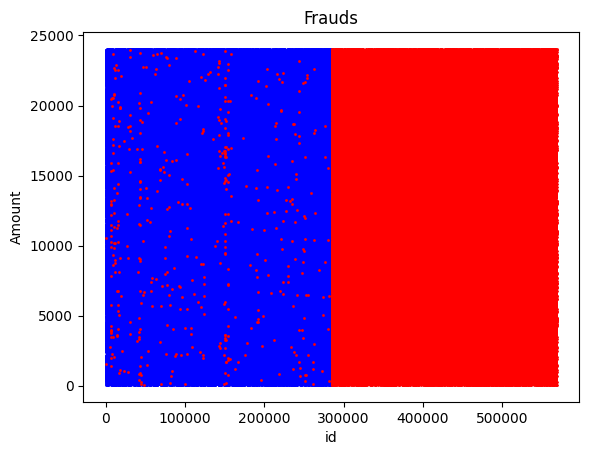

In [10]:
plt.figure()
plt.scatter(x=data_false['id'], y=data_false['Amount'], c='blue', s=1)
plt.scatter(x=data_true['id'], y=data_true['Amount'], c='red', s=1)
plt.title('Frauds')
plt.xlabel('id')
plt.ylabel('Amount')

### Outliers in data

#### BoxPlots of features

In [11]:
def plotVs(df):
    plt.figure(figsize=(18, 6))
    plt.boxplot(df.filter(regex='[V]'))
    plt.title('BoxPlot')
    plt.xlabel('V features')
    plt.ylabel('Value')

Text(0, 0.5, 'Amount')

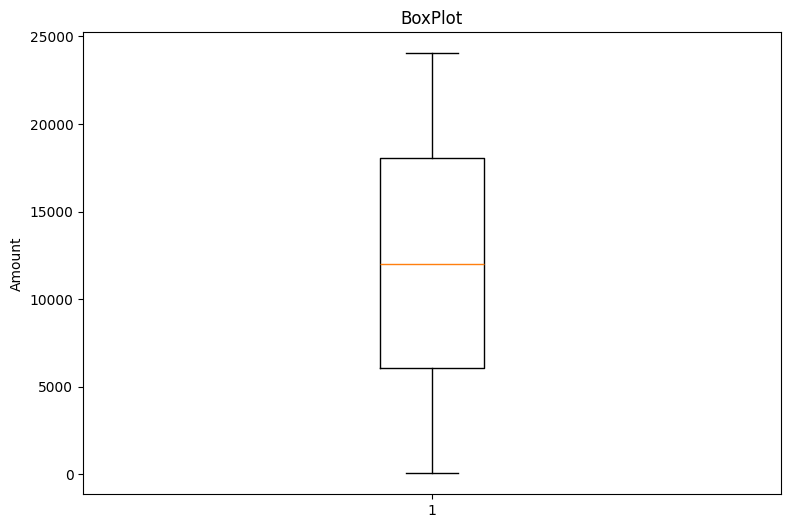

In [12]:
plt.figure(figsize=(9, 6))
plt.boxplot(data['Amount'])
plt.title('BoxPlot')
plt.ylabel('Amount')

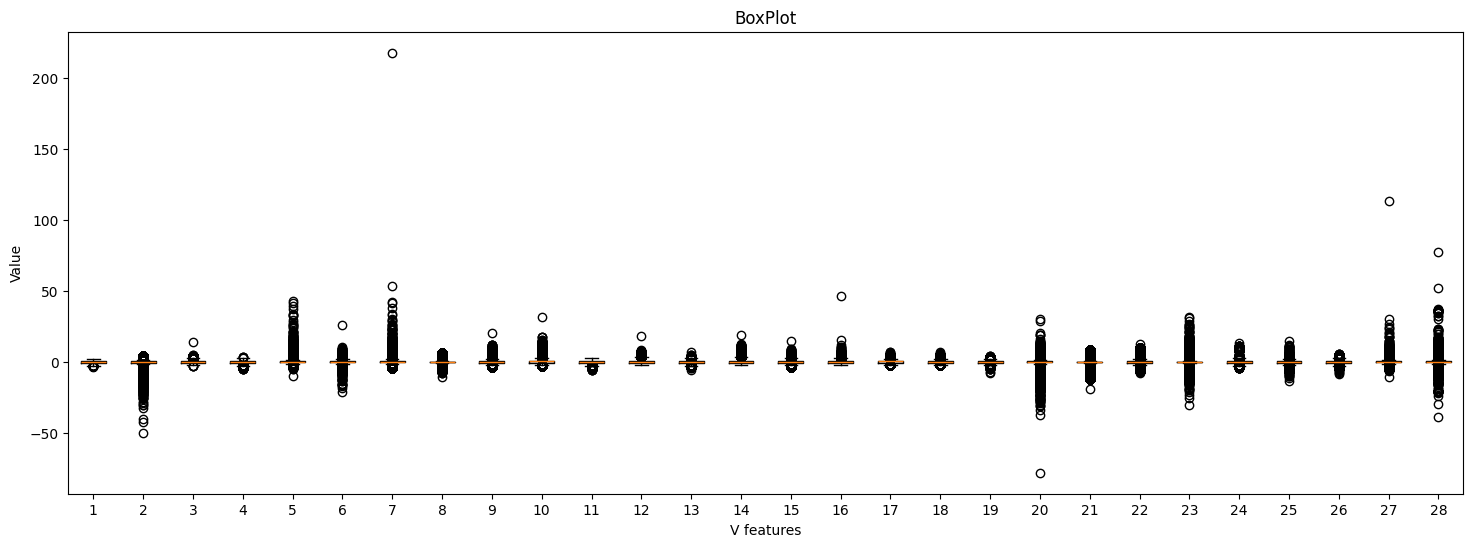

In [13]:
plotVs(data)

Text(0, 0.5, 'V2')

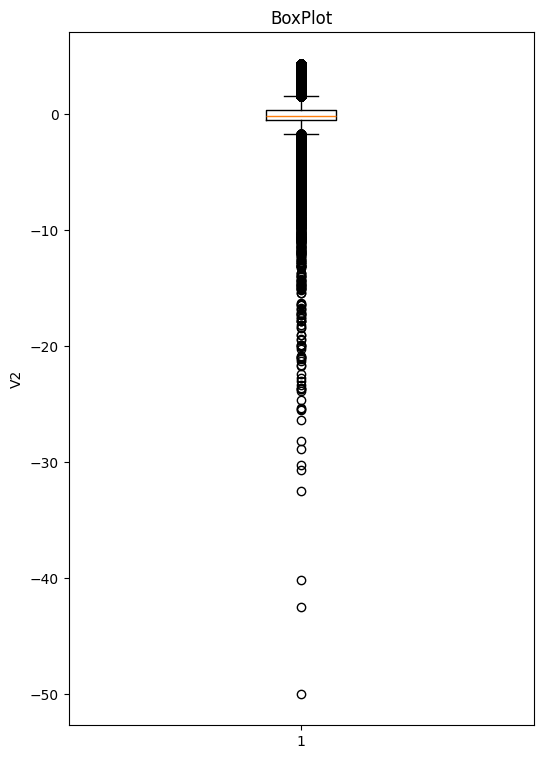

In [14]:
plt.figure(figsize=(6, 9))
plt.boxplot(data['V2'])
plt.title('BoxPlot')
plt.ylabel('V2')

#### Number of outliers

In [15]:
# Function to count outliers in data
def countOutliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)

In [16]:
countOutliers(data)

V8        93856
V27       82235
V23       72056
V5        71015
V28       70242
V20       65708
V21       57138
V7        55997
V6        48854
V2        43620
V25       28089
V19       19519
V9        18939
V18       16676
V17       14890
V22       13706
V10       10710
V15        6780
V26        6554
V16        4546
V3         4300
V13        4197
V4         2766
V24        2029
V14        1088
V11         709
V12         700
V1           30
Amount        0
id            0
Class         0
dtype: int64

We cannot use standard MinMaxScaler here as the number of outliers is gigantic and can affect the model

### Demonstrating MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

In [18]:
countOutliers(scaled_data)

V8        93856
V27       82235
V23       72056
V5        71015
V28       70242
V20       65708
V21       57138
V7        55997
V6        48854
V2        43620
V25       28089
V19       19519
V9        18939
V18       16676
V17       14890
V22       13706
V10       10710
V15        6780
V26        6554
V16        4546
V3         4300
V13        4197
V4         2766
V24        2029
V14        1088
V11         709
V12         700
V1           30
Amount        0
id            0
Class         0
dtype: int64

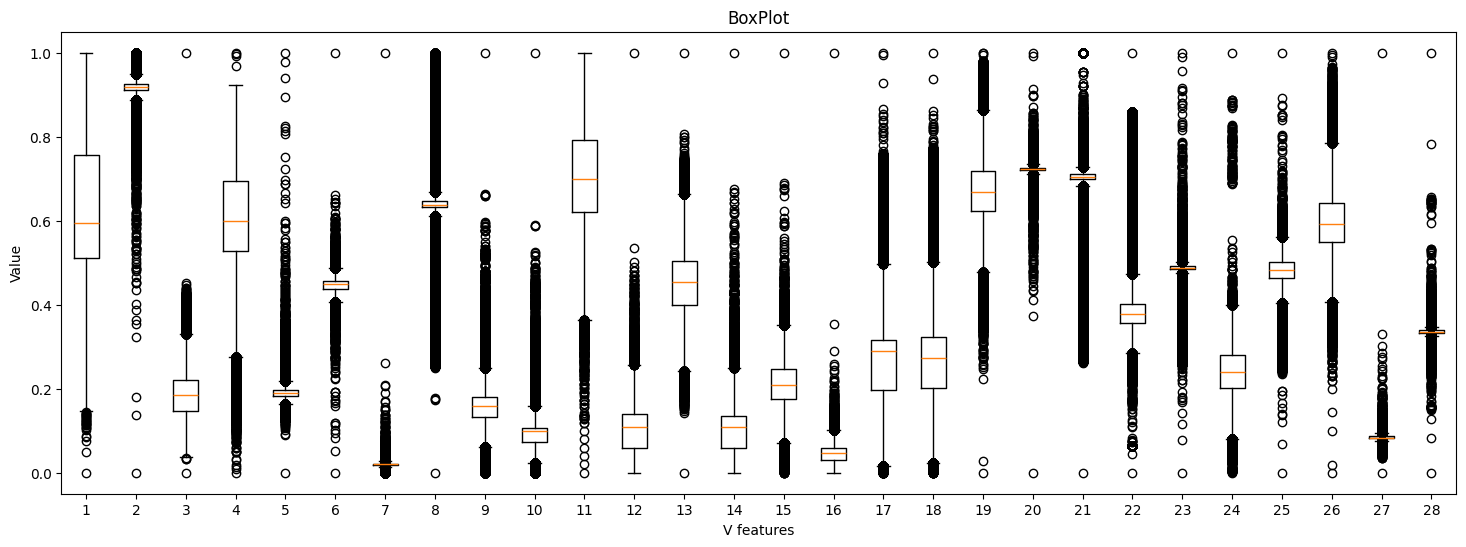

In [19]:
plotVs(scaled_data)

### Demonstrating a transformer to handle outliers

In [20]:
transformer = QuantileTransformer(n_quantiles=50)
transformer.fit(data)
trans_data = transformer.transform(data)
trans_data = pd.DataFrame(trans_data, columns=data.columns)

In [21]:
countOutliers(trans_data)

id        0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

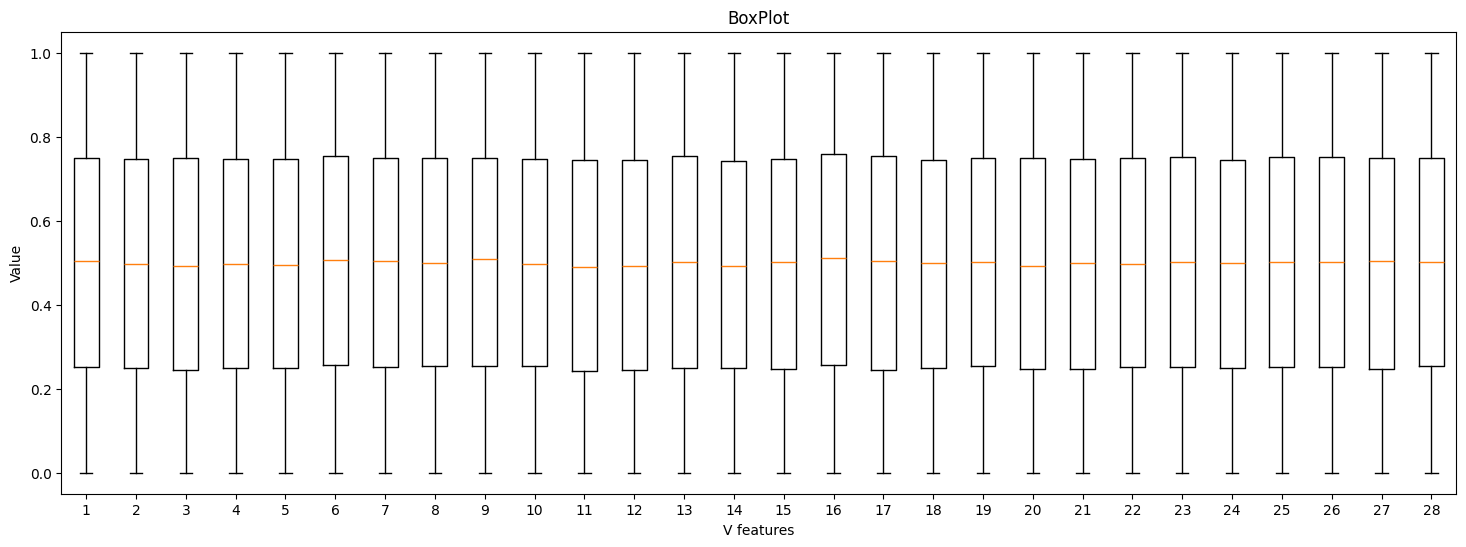

In [22]:
plotVs(trans_data)